
![](https://i.imgur.com/KhDDHls.gif)
![](https://i.imgur.com/Ffjv44w.gif)

from google.colab import drive
drive.mount('/content/drive')


<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: #123456;
            font-size: 100%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>  📌 <b>Customer ID</b> - Unique identifier for each customer.<br>
        📌 <b>Age</b> - Age of the customer.<br>
        📌 <b>Gender</b> - Gender of the customer (Male/Female).<br>
        📌 <b>Item Purchased</b> - The item purchased by the customer.<br>
        📌 <b>Category</b> - Category of the item purchased.<br>
        📌 <b>Purchase Amount (USD)</b> - The amount of the purchase in USD.<br>
        📌 <b>Location</b> - Location where the purchase was made.<br>
        📌 <b>Size</b> - Size of the purchased item.<br>
        📌 <b>Color</b> - Color of the purchased item.<br>
        📌 <b>Season</b> - Season during which the purchase was made.<br>
        📌 <b>Review Rating</b> - Rating given by the customer for the purchased item.<br>
        📌 <b>Subscription Status</b> - Indicates if the customer has a subscription (Yes/No).<br>
        📌 <b>Shipping Type</b> - Type of shipping chosen by the customer.<br>
        📌 <b>Discount Applied</b> - Indicates if a discount was applied to the purchase (Yes/No).<br>
        📌 <b>Promo Code Used</b> - Indicates if a promo code was used for the purchase (Yes/No).<br>
        📌 <b>Previous Purchases</b> - Number of previous purchases made by the customer.<br>
        📌 <b>Payment Method</b> - Customer's most preferred payment method.<br>
        📌 <b>Frequency of Purchases</b> - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).<br><br>
    <p style = "padding: 3px; color: Black;">


In [6]:
!pip install WordCloud

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


 **This line imports the dataset into a Pandas DataFrame named shop**.

*   pd.read_csv() is a function to read a CSV file into a DataFrame.
*   '/content/shopping_trends_updated.csv' is the path to the CSV file (adjust the path based on your file location).





In [8]:
shop = pd.read_csv('/content/shopping_trends_updated.csv')

 **Returns the dimensions of the DataFrame**

In [9]:
shop.shape

(3900, 18)

In [10]:
shop.to_excel('/content/shopping_trends_updated.xlsx')

**Displays the first 5 rows of the DataFrame by default.**

In [11]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Displays the data type of each column in the DataFrame.**

In [16]:
shop.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


**Lists all column names in the DataFrame.**

In [13]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

**Provides a concise summary of the DataFrame.**

In [14]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [15]:
shop.shape

(3900, 18)

**Checks for missing values in the dataset.**
*   isnull(): Identifies cells with missing values (NaN).
*   sum(): Sums up the number of missing values for each column.

In [19]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [18]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


## OBSERVATION:
Upon initial examination of the dataset, it is evident that we have a comprehensive and well-structured dataset with 3900 rows and 18 columns. The data is complete, with no missing values, which allows us to proceed confidently with our analysis.

Let's delve into the columns and their significance in understanding our custome      

-  **Customer ID:** This column serves as a unique identifier for each customer, enabling us to differentiate between individuals.
-  **Age:** The age column provides insights into the age demographics of our customers, helping us understand their preferences and behaviors.
-  **Gender:** This column showcases the gender of the customers, enabling us to analyze buying patterns based on gender.
-  **Item Purchased:** Here, we can identify the specific products that customers have bought, allowing us to gain an understanding of popular choices.
-  **Category:** The category column categorizes the products into different groups such as clothing, footwear, and more, aiding us in analyzing trends within specific product categories.
-  **Purchase Amount (USD):** This column reveals the amount customers spent on their purchases, providing insights into their spending habits.
-  **Location:** The location column indicates the geographical location of customers, which can help identify regional trends and preferences.
-  **Size:** This column denotes the size of the purchased products, assisting in understanding size preferences across different categories.
-  **Color:** Here, we can determine the color preferences of customers, aiding in analyzing color trends and their impact on purchasing decisions.
-  **Season:** The season column allows us to identify the season during which customers made their purchases, enabling us to explore seasonal shopping trends.
-  **Review Rating:** This column showcases the ratings given by customers, providing valuable feedback on product satisfaction and quality.
-  **Subscription Status:** This column indicates whether customers have opted for a subscription status, which can help us understand customer loyalty and engagement.
-  **Shipping Type:** Here, we can identify the different shipping methods used to deliver products to customers, shedding light on preferred shipping options.
-  **Discount Applied:** This column indicates whether a discount was applied to the purchased products, enabling us to analyze the impact of discounts on customer behavior.
-  **Promo Code Used:** Here, we can identify whether customers utilized promo codes during their purchases, helping us evaluate the effectiveness of promotional campaigns.
-  **Previous Purchases:** This column reveals the number of previous purchases made by customers, aiding in understanding customer loyalty and repeat business.
-  **Payment Method:** The payment method column showcases the various methods used by customers to make their purchases, allowing us to analyze preferred payment options.
-  **Frequency of Purchases:** This column provides insights into the frequency at which customers make purchases, helping us identify patterns and customer buying habits.

ustomer buying habits.
With this rich and diverse dataset, we are well-equipped to explore customer shopping trends, understand their preferences, and uncover valuable insights that can drive informed decision-making and enhance the overall customer experience. Let's embark on this exciting analysis journey!



## 1 What is the overall distribution of customer ages in the dataset?

**This command calculates the frequency of each unique value in the Age column of the shop DataFrame.**

In [17]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [20]:
shop['Age'].mean()

44.06846153846154

In [21]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

**Creates a histogram, which is typically used to display the distribution of a numerical variable**
*   shop: The dataset being used (your DataFrame).
*   y='Age': The Age values are plotted on the y-axis

*   x='Age_category': The Age_category is plotted on the x-axis.

In [30]:
fig = px.histogram(shop , y = 'Age' , x = 'Age_category' , color='Gender')
fig.update_layout(
    title="Age Distribution by Category",
    xaxis_title="Age Category",
    yaxis_title="Frequency",
    template="plotly_white"
)
fig.show()

**OBSERVATION**

> It seems old age people are most customers. Male customers are more than female customers.



## 2 How does the average purchase amount vary across different product categories?

In [31]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [32]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

**Calculates the average purchase amount for each category.**



In [42]:
avg_purchase = shop.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print(avg_purchase)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


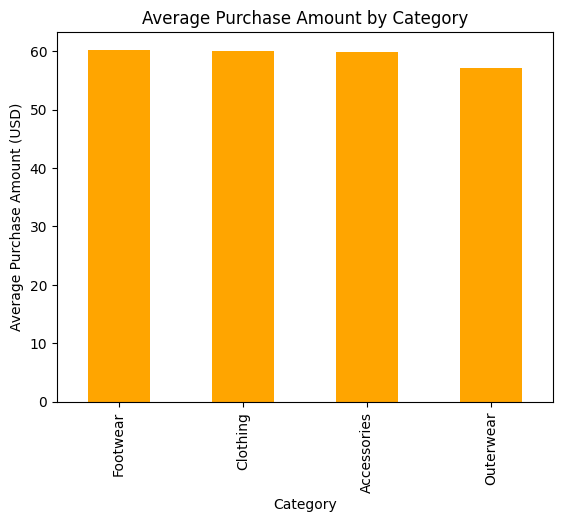

In [41]:
avg_purchase.plot(kind='bar', x='Category', y='Purchase Amount (USD)', color='orange')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


In [65]:
avg_purchase = shop.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print(avg_purchase)

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


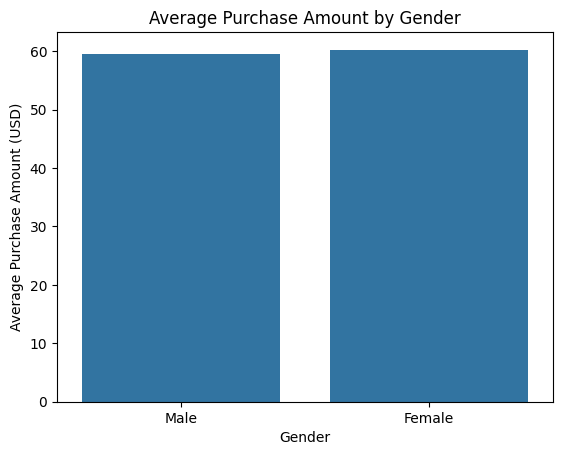

In [60]:
sns.barplot(data=shop, x='Gender', y='Purchase Amount (USD)', errorbar=None)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

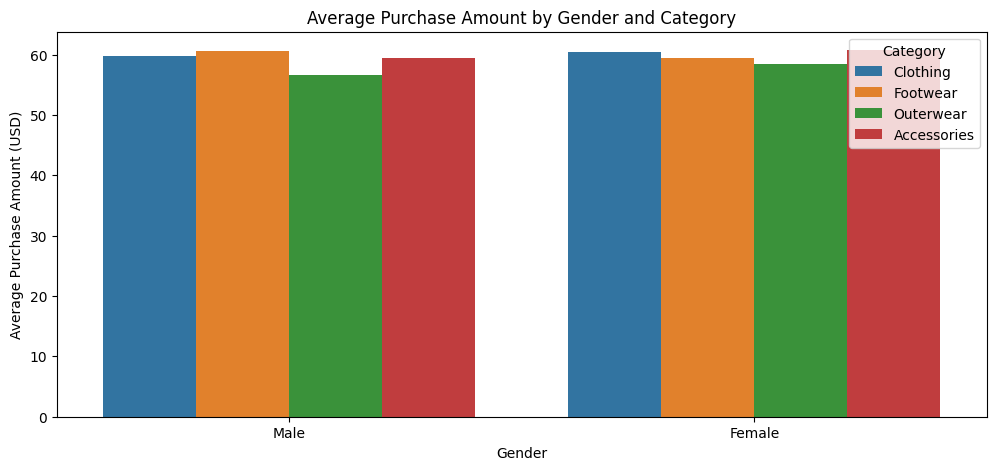

In [61]:
fig, axes = plt.subplots(1, figsize=(12, 5))
sns.barplot(data=shop, x='Gender', y='Purchase Amount (USD)', hue='Category', errorbar=None)
plt.title('Average Purchase Amount by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Category')
plt.show()

**OBSERVATION:**

> Average count of footwear is most. Average count of female is more than male.



## 3 Which gender has the highest number of purchases?

In [43]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

**Total Count of purchases by Gender**

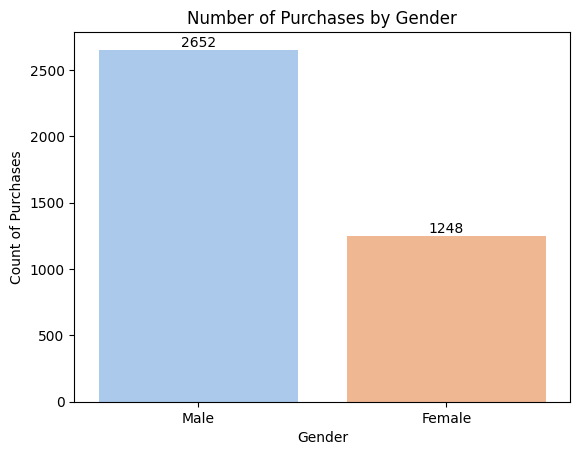

In [59]:
purchase_count = shop['Gender'].value_counts()

sns.barplot(x=purchase_count.index, y=purchase_count.values, hue=purchase_count.index, palette='pastel', legend=False)
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Purchases')

for i, count in enumerate(purchase_count.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.show()

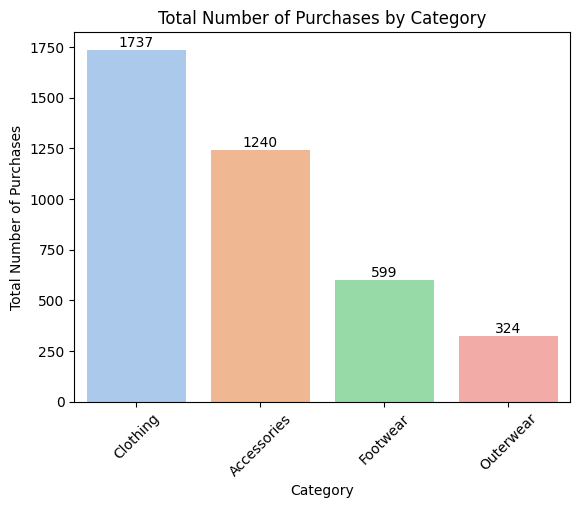

In [64]:
purchase_count_by_category = shop['Category'].value_counts()

sns.barplot(x=purchase_count_by_category.index, y=purchase_count_by_category.values, hue=purchase_count_by_category.index, palette='pastel',legend = False)
plt.title('Total Number of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Total Number of Purchases')

for i, count in enumerate(purchase_count_by_category.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

**OBSERVATION**:

> Total purchases is greater in clothing. Male purchase is more than female.



## 4 What are the most commonly purchased items in each category?

In [66]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

**Count of item purchased in Category**

In [79]:
grouped_data = shop.groupby('Category')['Item Purchased'].value_counts()
table_format = grouped_data.reset_index(name='Count')
print(table_format)


       Category Item Purchased  Count
0   Accessories        Jewelry    171
1   Accessories           Belt    161
2   Accessories     Sunglasses    161
3   Accessories          Scarf    157
4   Accessories            Hat    154
5   Accessories        Handbag    153
6   Accessories       Backpack    143
7   Accessories         Gloves    140
8      Clothing         Blouse    171
9      Clothing          Pants    171
10     Clothing          Shirt    169
11     Clothing          Dress    166
12     Clothing        Sweater    164
13     Clothing          Socks    159
14     Clothing          Skirt    158
15     Clothing         Shorts    157
16     Clothing         Hoodie    151
17     Clothing        T-shirt    147
18     Clothing          Jeans    124
19     Footwear        Sandals    160
20     Footwear          Shoes    150
21     Footwear       Sneakers    145
22     Footwear          Boots    144
23    Outerwear         Jacket    163
24    Outerwear           Coat    161


In [82]:
table_format.to_csv('category_item_counts.csv', index=False)


TABULAR FORMAT

In [83]:
from tabulate import tabulate
print(tabulate(table_format, headers='keys', tablefmt='grid'))


+----+-------------+------------------+---------+
|    | Category    | Item Purchased   |   Count |
+====+=============+==================+=========+
|  0 | Accessories | Jewelry          |     171 |
+----+-------------+------------------+---------+
|  1 | Accessories | Belt             |     161 |
+----+-------------+------------------+---------+
|  2 | Accessories | Sunglasses       |     161 |
+----+-------------+------------------+---------+
|  3 | Accessories | Scarf            |     157 |
+----+-------------+------------------+---------+
|  4 | Accessories | Hat              |     154 |
+----+-------------+------------------+---------+
|  5 | Accessories | Handbag          |     153 |
+----+-------------+------------------+---------+
|  6 | Accessories | Backpack         |     143 |
+----+-------------+------------------+---------+
|  7 | Accessories | Gloves           |     140 |
+----+-------------+------------------+---------+
|  8 | Clothing    | Blouse           |     171 |


In [72]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category')
fig.update_layout(
    title="Commonly purchased item in each category",
    xaxis_title="Item Purchased",
    yaxis_title="Count",
    template="plotly_white"
)
fig.show()

**OBSERVATION:**

> Blouse and shirts have most purchase in Clothing category.

> Sandals have most purchase in Footwear category.

> Jacket have most purchase in Outwear category.

> Jewellery have most purchase in Accessories category.

## 5 Are there any specific seasons or months where customer spending is significantly higher?

In [80]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [74]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [75]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [76]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [77]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

In [84]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )
fig.update_layout(
    title="Total Purchase by Season",
    xaxis_title="Season",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

In [81]:
fig = px.pie(
    shop,
    names='Season',
    title='Distribution of Purchases by Season',
    hole=0.4
)

fig.show()


**OBSERVATION:**

> Spring season has most purchages.



## 6 What is the average rating given by customers for each product category?

In [86]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [90]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating', color = 'Category' )
fig.update_layout(
    title="Average Rating by Category",
    xaxis_title="Category",
    yaxis_title="Average Rating",
    template="plotly_white"
)
fig.show()

In [91]:

fig = px.line(
    shop_groupby,
    x='Category',
    y='Review Rating',
    title='Review Ratings by Category',
    markers=True
)
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Average Review Rating',
    title='Review Ratings by Category',
    template='plotly_dark'
)
fig.show()

**OBSERVATION:**

> Footwear has best review rating.



## 7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [92]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [93]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

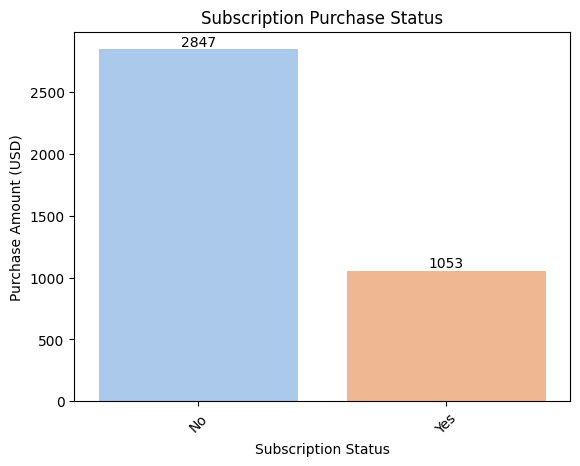

In [97]:
subscription_count = shop['Subscription Status'].value_counts()

sns.barplot(x=subscription_count.index, y=subscription_count.values, hue=subscription_count.index, palette='pastel',legend = False)
plt.title('Subscription Purchase Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')

for i, count in enumerate(subscription_count.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [98]:
shop['Purchase Amount (USD)'].sum()

233081

In [96]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


**OBSERVATION:**

> Non Subscription has more purchases than subscription.



## 8 Which payment method is the most popular among customers?

In [99]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


In [100]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [102]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)',color = 'Payment Method')
fig.update_layout(
    title="Average Purchase Amount by Payment Method",
    xaxis_title="Payment Method",
    yaxis_title="Average Purchase Amount (USD)",
    template="plotly_white"
)
fig.show()

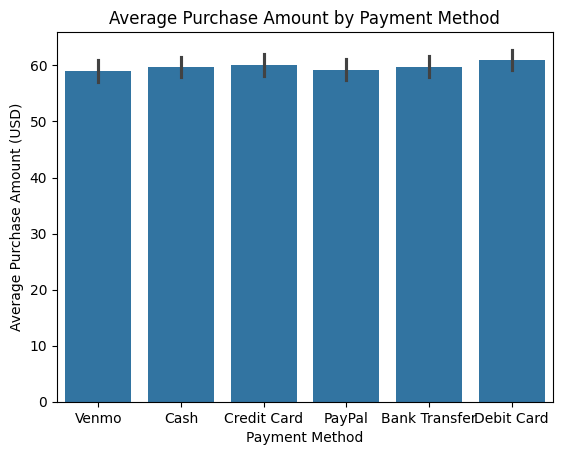

In [104]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)',legend = False)
plt.title('Average Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

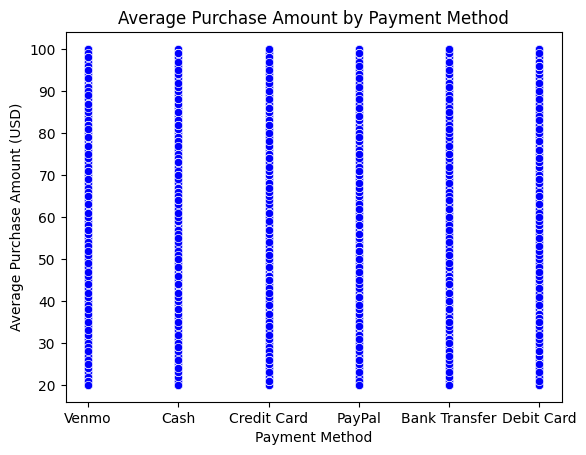

In [105]:
sns.scatterplot(data=shop, x='Payment Method', y='Purchase Amount (USD)', color='blue')
plt.title('Average Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

**OBSERVATION:**

> Debit Card is mostly the payement method



## 9 Do customers who use promo codes tend to spend more than those who don't?

In [106]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [111]:
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)',color = 'Gender')
fig.update_layout(
    title="Total Purchase by Gender and Promo Code Used",
    xaxis_title="Promo Code Used",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

In [110]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)',color = 'Promo Code Used')
fig.update_layout(
    title="Total Purchase by Promo Code Used",
    xaxis_title="Promo Code Used",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

**OBSERVATION:**

> Purchases by Promo Code is more, and that done by males only.



## 10 How does the frequency of purchases vary across different age groups?

In [112]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [113]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [114]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [126]:
grouped_data = shop.groupby(['Frequency of Purchases', 'Age_category'], observed=True)['Age'].count().reset_index()

fig = px.sunburst(
    grouped_data,
    path=['Frequency of Purchases', 'Age_category'],
    values='Age',
    title='Sunburst Chart of Frequency of Purchases by Age Category'
)
fig.show()


In [127]:
fig = px.treemap(
    grouped_data,
    path=['Frequency of Purchases', 'Age_category'],
    values='Age',
    title='Treemap of Frequency of Purchases by Age Category'
)
fig.show()


In [125]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**OBSERVATION:**

> Every 3 month, Monthly , Fortnightly and weekly  => Middle aged Adults has more purchases

> Annually, , Quartely and Bi-weekly  => Old aged has more purchases





## 11 Are there any correlations between the size of the product and the purchase amount?

In [128]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [129]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [131]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)' ,color = 'Size' )
fig.update_layout(
    title="Total Purchase by Size",
    xaxis_title="Size",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

**OBSERVATION:**

> Medium Size has more purchases



## 12 Which shipping type is preferred by customers for different product categories?

Shipping Type Table

In [132]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [133]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [135]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

In [134]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

 Group and count shipping types by product category

In [139]:

shipping_counts = shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False)
print(shipping_counts)


Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64


In [136]:
shipping_type_mapping = {
    'Express': 0,
    'Free Shipping': 1,
    'Next Day Air': 2,
    'Standard': 3,
    '2-Day Shipping': 4,
    'Store Pickup': 5
}

shop['Shipping_Category'] = shop['Shipping Type'].map(shipping_type_mapping)


In [138]:
category_mapping = {
    'Clothing': 1,
    'Footwear': 2,
    'Outerwear': 3,
    'Accessories': 4
}

shop['Category_num'] = shop['Category'].map(category_mapping)


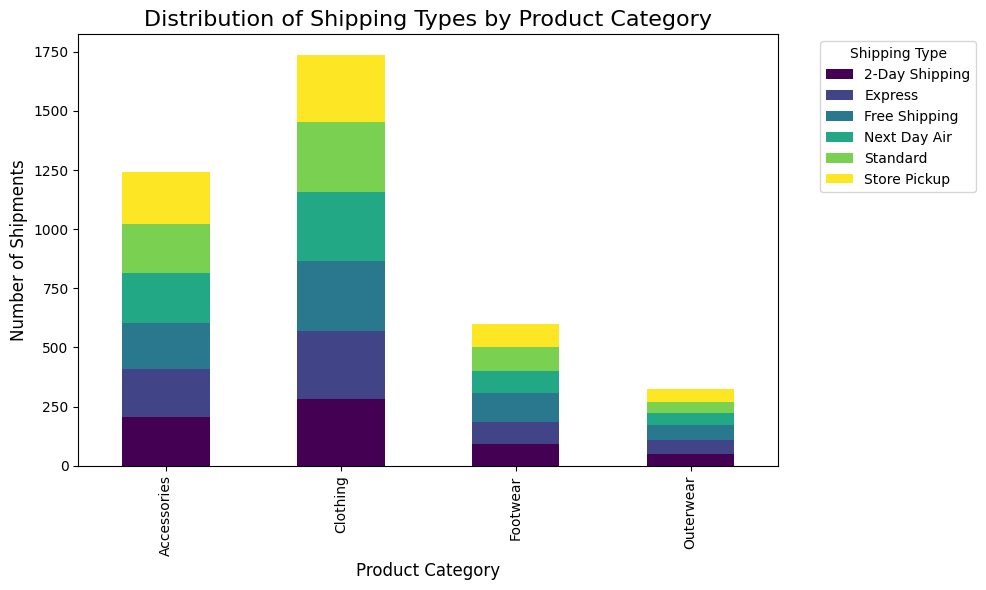

In [142]:

shipping_summary = shop.groupby(['Category', 'Shipping Type']).size().unstack(fill_value=0)

shipping_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Distribution of Shipping Types by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


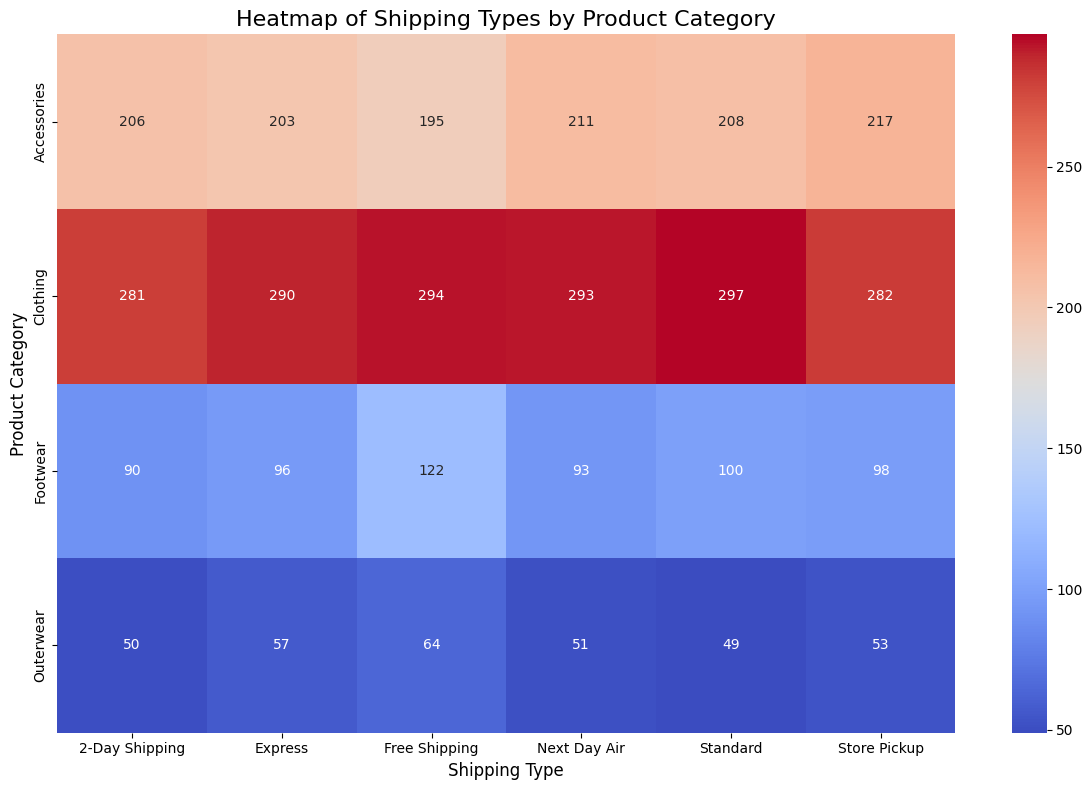

In [143]:

heatmap_data = shop.groupby(['Category', 'Shipping Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')

plt.title('Heatmap of Shipping Types by Product Category', fontsize=16)
plt.xlabel('Shipping Type', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


**OBSERVATION:**

> Accessories has more purchase by Store Pickup shipping type

> Clothing has more purchase by Standard shipping type

> Footwear has more purchase by Free shipping type

> Outwear has more purchase by Free Shipping type









## 13 How does the presence of a discount affect the purchase decision of customers?

In [144]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category',
       'Shipping_Category', 'Category_num'],
      dtype='object')

In [145]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [148]:
fig = px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)', color='Discount Applied')
fig.update_layout(
    title="Total Purchase by Discount Applied",
    xaxis_title="Discount Applied",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

In [149]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')
fig.update_layout(
    title="Total Purchase by Gender and Discount Applied",
    xaxis_title="Discount Applied",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

**OBSERVATION:**

> Discount Applied has about 100k purchases which is good but still less than not discount appled purchases.

> Discount Applied more on purchases by Male.





## 14 Are there any specific colors that are more popular among customers?

In [152]:
fig = px.histogram(shop , x = 'Color', color = 'Color')
fig.update_layout(
    title="Total Purchase by Color",
    xaxis_title="Color",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

In [153]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


**OBSERVATION:**

> Olive has more purchases than any other colour



## 15 What is the average number of previous purchases made by customers?

In [157]:
shop['Previous Purchases'].mean()

25.35153846153846

Mean value of numeric columns

In [169]:
mean_numeric_columns = shop.select_dtypes(include=np.number).mean()

mean_df = pd.DataFrame({'Column': mean_numeric_columns.index, 'Mean': mean_numeric_columns.values})
print(tabulate(mean_df, headers='keys', tablefmt='psql'))

+----+-----------------------+------------+
|    | Column                |       Mean |
|----+-----------------------+------------|
|  0 | Customer ID           | 1950.5     |
|  1 | Age                   |   44.0685  |
|  2 | Purchase Amount (USD) |   59.7644  |
|  3 | Review Rating         |    3.74995 |
|  4 | Previous Purchases    |   25.3515  |
|  5 | Shipping_Category     |    2.48487 |
|  6 | Category_num          |    2.27359 |
+----+-----------------------+------------+


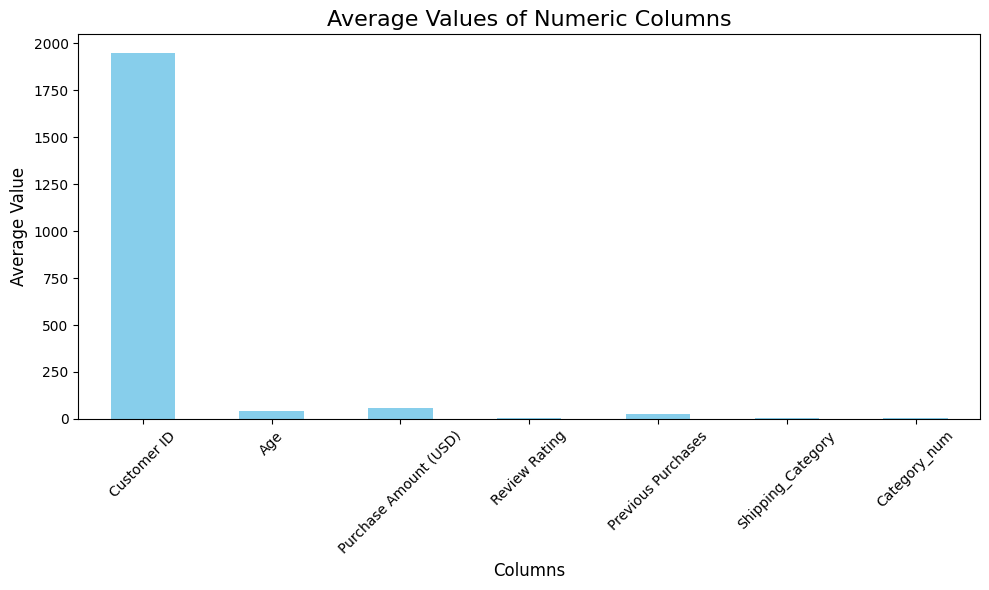

In [170]:

numeric_columns = shop.select_dtypes(include=np.number).columns

mean_values = shop[numeric_columns].mean()

mean_df = pd.DataFrame({'Column': mean_values.index, 'Mean Value': mean_values.values})

mean_values.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Values of Numeric Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**OBSERVATION:**

> Previous Purchases has mean value 25.35

> Purchase Amount has mean value 59.76





# 16 How does the purchase amount differ based on the review ratings given by customers?

Review Rating and Purchase Amount

In [171]:
rating_analysis = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()
print(rating_analysis)


    Review Rating  Purchase Amount (USD)
0             2.5              62.287879
1             2.6              59.566038
2             2.7              59.363636
3             2.8              57.066176
4             2.9              56.470588
5             3.0              60.728395
6             3.1              58.770701
7             3.2              61.315789
8             3.3              59.861842
9             3.4              59.005495
10            3.5              58.833333
11            3.6              57.322148
12            3.7              58.974359
13            3.8              60.873239
14            3.9              58.926380
15            4.0              59.237569
16            4.1              61.959459
17            4.2              60.853801
18            4.3              59.673469
19            4.4              60.525316
20            4.5              59.489209
21            4.6              57.683908
22            4.7              59.283784
23            4.

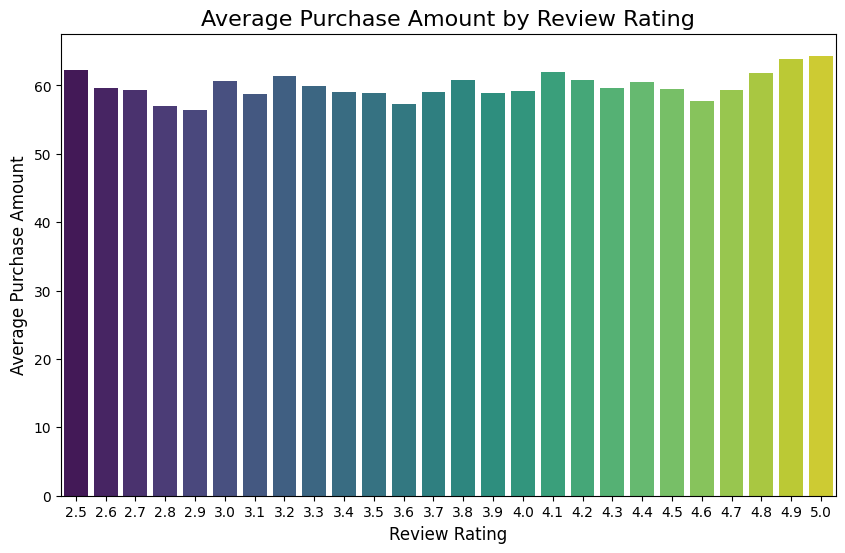

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Rating', y='Purchase Amount (USD)', data=rating_analysis, palette='viridis')
plt.title('Average Purchase Amount by Review Rating', fontsize=16)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.show()


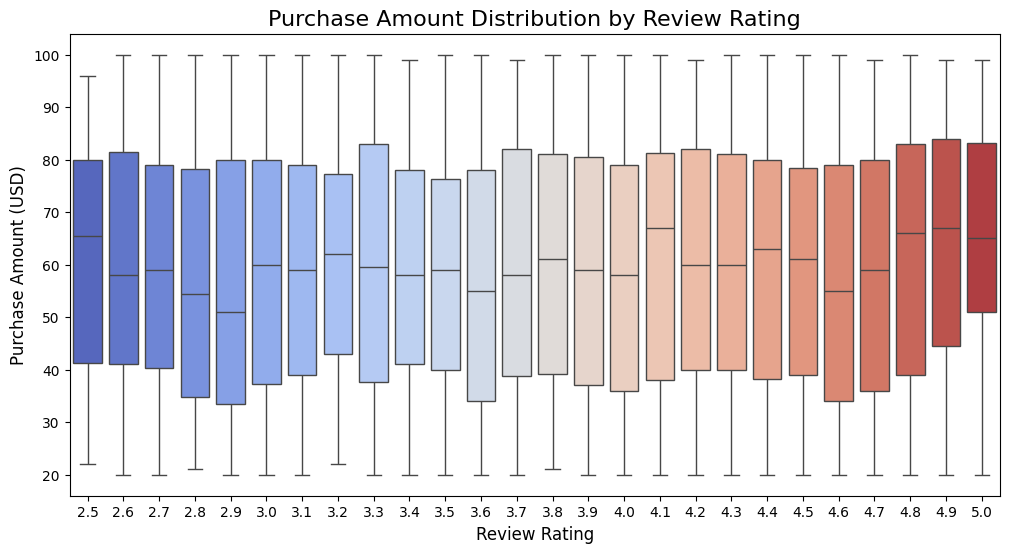

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Review Rating', y='Purchase Amount (USD)', data=shop, palette='coolwarm')
plt.title('Purchase Amount Distribution by Review Rating', fontsize=16)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.show()


**OBSERVATION:**

> Rating 5.0 has highest purchase amount



## 17 Are there any noticeable differences in purchase behavior between different locations?

Location and Purchase Amount

In [174]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [175]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [177]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)',color='Location')
fig.update_layout(
    title="Total Purchase by Location",
    xaxis_title="Location",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

**OBSERVATION:**

> Alaska has most purchases



# 18 Is there a relationship between customer age and the category of products they purchase?

In [178]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [180]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category',color = 'Category')
fig.update_layout(
    title="Average Age by Category",
    xaxis_title="Category",
    yaxis_title="Average Age",
    template="plotly_white"
)
fig.show()

OBSERVATION:

> Average age is between 40 and 45 for purchases for each category


## 19 How does the average purchase amount differ between male and female customers?

In [181]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [183]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)', color = 'Gender')
fig.update_layout(
    title="Total Purchase by Gender",
    xaxis_title="Gender",
    yaxis_title="Total Purchase",
    template="plotly_white"
)
fig.show()

In [184]:
px.sunburst(data_frame= shop , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')

OBSERVATION:

>Female has about half the purchase amount than male

>In Male, Middle Aged Adults has more purchases

> In Female , Middle aged Adults has more purchases







# 20 How does the number of previous purchases correlate with spending?

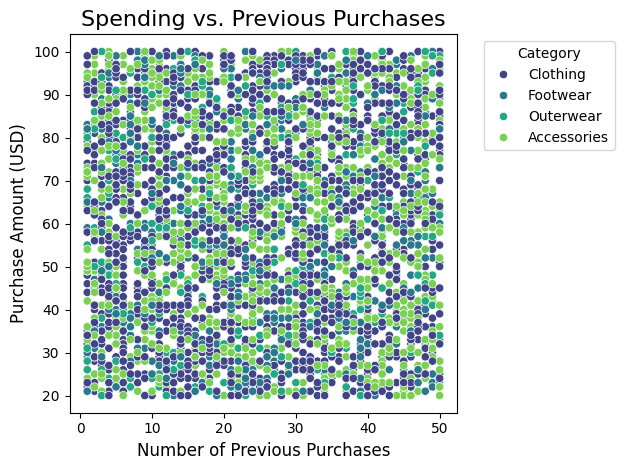

In [186]:
sns.scatterplot(
    x=shop['Previous Purchases'],
    y=shop['Purchase Amount (USD)'],
    hue=shop['Category'],
    palette="viridis"
)

plt.title('Spending vs. Previous Purchases', fontsize=16)
plt.xlabel('Number of Previous Purchases', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**OBSERVATION:**

>Gradual increase in spending is noticeable with an increasing number of previous purchases, indicating a loyalty effect where frequent customers spend more.

